In [1]:
# Install kaggle 
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/  # Download kaggle.json from kaggle account
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# check dataset list to ensure kaggle api is working.
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          23976        671  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1478         34  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1329         34  1.0              
fatihb/coffee-quality-data-cqi

In [16]:
!kaggle datasets download -d "swaroopkml/cifar10-pngs-in-folders"

 98% 137M/140M [00:06<00:00, 29.0MB/s]
100% 140M/140M [00:06<00:00, 23.1MB/s]


In [20]:
import zipfile

with zipfile.ZipFile('cifar10-pngs-in-folders.zip', 'r') as z:
  z.extractall('cifar10-pngs-in-folders')

In [21]:
class_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_dict = {j:i for i, j in enumerate(class_list)}
class_dict

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [32]:
import os
import cv2
import numpy as np
import pandas as pd
images = []
labels = []
file_names= []
def load_img(class_path):
  for i in class_list:
    for j in os.listdir(os.path.join(class_path, i)):
      img = cv2.imread(os.path.join(class_path, i, j))
      images.append(np.array(img/255))
      file_names.append(os.path.join(class_path, i, j))
      labels.append(class_dict[i])
load_img('cifar10/test/')
load_img('cifar10/train/')

print(len(images))
print(len(file_names))
print(len(labels))
images = np.array(images)


60000
60000
60000


In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

x_train,x_test, y_train,  y_test = train_test_split(images, labels, test_size=0.2 , shuffle=False, random_state = 121)
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)

(48000, 32, 32, 3)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

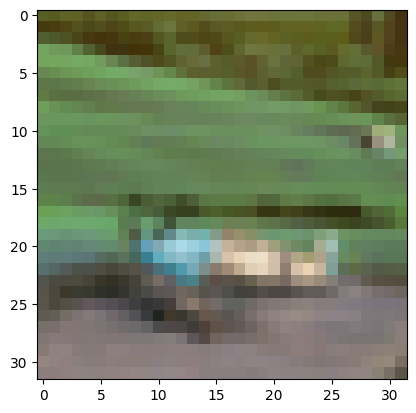

In [55]:
plt.imshow(x_train[0])


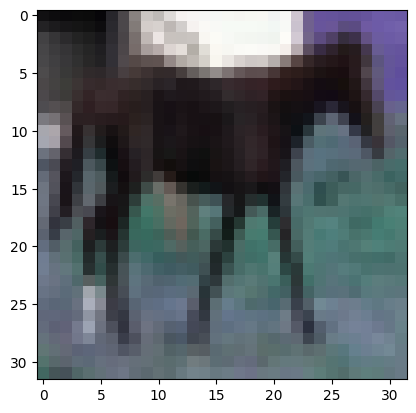

In [56]:
plt.imshow(x_test[0])

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential

cnn = models.Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
                         layers.MaxPool2D(2,2),
                         
                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPool2D(2,2),

                        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                        layers.MaxPool2D(2,2),
                         
                         layers.Flatten(),
                         layers.Dense(128, activation='relu'),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
                        
                        
])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [67]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train, epochs=15)

Epoch 1/15
1500/1500 [==============================] - 61s 40ms/step - loss: 1.3721 - accuracy: 0.5060
Epoch 2/15
1500/1500 [==============================] - 60s 40ms/step - loss: 1.1019 - accuracy: 0.6080
Epoch 3/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.9514 - accuracy: 0.6634
Epoch 4/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.8551 - accuracy: 0.6984
Epoch 5/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.7752 - accuracy: 0.7263
Epoch 6/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.7114 - accuracy: 0.7488
Epoch 7/15
1500/1500 [==============================] - 59s 39ms/step - loss: 0.6534 - accuracy: 0.7697
Epoch 8/15
1500/1500 [==============================] - 59s 40ms/step - loss: 0.6090 - accuracy: 0.7847
Epoch 9/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.5599 - accuracy: 0.8035
Epoch 10/15
1500/1500 [==============================] - 60s 40m

In [70]:
cnn.evaluate(np.array(x_test), np.array(y_test))

375/375 [==============================] - 6s 15ms/step - loss: 1.9398 - accuracy: 0.5538


[1.939754605293274, 0.5538333058357239]

In [71]:
predict_train = cnn.predict(x_train)
predict_test = cnn.predict(x_test)
print(predict_train)
print(predict_test)

375/375 [==============================] - 5s 12ms/step
[[9.9046409e-01 3.6825780e-03 3.9371042e-04 ... 8.0511063e-06
  3.2159586e-03 2.1820776e-03]
 [9.9998850e-01 1.1081543e-05 1.4414216e-10 ... 1.7621068e-13
  3.4824205e-07 6.8869149e-10]
 [9.2183423e-01 8.8188819e-05 1.5341296e-02 ... 1.0737799e-03
  1.0336072e-03 9.5218085e-05]
 ...
 [2.7169770e-02 2.5063416e-04 4.6087891e-02 ... 8.8999462e-01
  4.5179424e-04 6.7714998e-04]
 [1.0851938e-06 3.8411831e-06 2.5491663e-06 ... 9.9711007e-01
  6.5673743e-07 7.5688508e-06]
 [3.0180329e-04 9.9070705e-03 1.0289984e-03 ... 9.1954261e-01
  3.1847384e-02 2.7387356e-04]]
[[6.1191227e-13 9.7823683e-15 1.4720866e-13 ... 9.9999923e-01
  4.3673421e-15 1.2984274e-14]
 [3.2015253e-06 3.9263295e-08 3.3914832e-06 ... 9.9967092e-01
  1.3825750e-06 3.2447596e-07]
 [6.4678240e-04 1.2734054e-03 1.0962318e-01 ... 5.6368434e-01
  1.6559467e-04 2.3125362e-04]
 ...
 [2.6261234e-01 3.8948413e-02 1.8691137e-01 ... 8.1369884e-02
  2.1326521e-02 3.6207575e-02]
 [4

In [88]:
class_dict1 = {i:j for i, j in enumerate(class_list)}
file_path = []
gt_class = []
pd_class = []
pd_score = []
print(len(predict_test))
for i in range(0,12000):
  file_path.append(file_names[i])
  gt_class.append(class_dict1[labels[i]])
  pd_class.append("")
  pd_score.append("")
  for j in range(len(class_list)):
    file_path.append(file_names[i])
    gt_class.append("")
    pd_class.append(class_list[j])
    pd_score.append(predict_test[i][j])
k = 0
print((predict_train[0][0]))
print(len(predict_train))
for i in range(12000,len(file_names)):
  file_path.append(file_names[i])
  gt_class.append(class_dict1[labels[i]])
  pd_class.append("")
  pd_score.append("")
  for j in range(len(class_list)):
    file_path.append(file_names[i])
    gt_class.append("")
    pd_class.append(class_list[j])
    pd_score.append(predict_train[k][j])
  k = k+1
pred_df = pd.DataFrame(list(zip(file_path, gt_class, pd_class, pd_score)), columns = ['file_path','gt_class','pd_class', 'pd_Score'])
pred_df

12000
0.9904641
48000


,file_path,gt_class,pd_class,pd_Score
0,cifar10/test/airplane/0319.png,airplane,,
1,cifar10/test/airplane/0319.png,,airplane,0.0
2,cifar10/test/airplane/0319.png,,automobile,0.0
3,cifar10/test/airplane/0319.png,,bird,0.0
4,cifar10/test/airplane/0319.png,,cat,0.0
...,...,...,...,...
659995,cifar10/train/truck/0942.png,,dog,0.008157
659996,cifar10/train/truck/0942.png,,frog,0.00012
659997,cifar10/train/truck/0942.png,,horse,0.919543
659998,cifar10/train/truck/0942.png,,ship,0.031847


In [89]:
pred_df.to_csv('cifar10.csv',index=False)

In [95]:
from sklearn.metrics import classification_report
predictions = []
for j in predict_test:
  predictions.append(np.argmax(j))
for j in predict_train:
  predictions.append(np.argmax(j))
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.14      0.20      0.17      6000
           1       0.00      0.00      0.00      6000
           2       0.02      0.02      0.02      6000
           3       0.01      0.01      0.01      6000
           4       0.02      0.02      0.02      6000
           5       0.05      0.04      0.05      6000
           6       0.02      0.02      0.02      6000
           7       0.04      0.04      0.04      6000
           8       0.01      0.01      0.01      6000
           9       0.14      0.09      0.11      6000

    accuracy                           0.04     60000
   macro avg       0.04      0.04      0.04     60000
weighted avg       0.04      0.04      0.04     60000

